In [1]:
#import scrublet as scr
import numpy as np
import pandas as pd
import statistics as st
import re
import csv
import scanpy as sc 
import scanpy.external as sce
import phate
import matplotlib
from matplotlib import pyplot as plt
import warnings
from scipy.stats import binom
from scipy.stats import multinomial
import seaborn as sns
from scipy.stats import hypergeom
import warnings
warnings.filterwarnings('ignore')
import matplotlib.patches as mpatches

import scrublet as scr
import harmonypy as hm
import pickle
from random import sample
from matplotlib_venn import venn2
import scipy

### Load Data (from)

In [2]:
file_dir = ''
#Genome_Tracks = pd.read_csv(file_dir + 'DAP_Enhancers.quantified', delimiter='\t', header =1)
#Summary_File = pd.read_csv(file_dir + 'DAP_Enhancers.quantified.summary', delimiter='\t', header =0, index_col=0)

In [3]:
New_Col_Name = ['GeneID', 'Chr','Start', 'End', 'Strand','Length',
            'D0_H3K27ac','D0_H3K27ac', 'D2_H3K27ac', 'D2_H3K27ac', 'D5_H3K27ac', 'D5_H3K27ac', 'D7_H3K27ac', 'D7_H3K27ac', 'D15_H3K27ac', 'D15_H3K27ac', 'D80_H3K27ac', 'D80_H3K27ac',
            'D0_Input', 'D0_Input', 'D2_Input', 'D2_Input', 'D5_Input', 'D5_Input', 'D7_Input', 'D7_Input', 'D15_Input', 'D15_Input', 'D80_Input', 'D80_Input',
            'D0_ATAC', 'D0_ATAC', 'D2_ATAC', 'D2_ATAC', 'D4_ATAC', 'D4_ATAC', 'D30_ATAC', 'D30_ATAC']

New_Name = ['D0_H3K27ac','D0_H3K27ac', 'D2_H3K27ac', 'D2_H3K27ac', 'D5_H3K27ac', 'D5_H3K27ac', 'D7_H3K27ac', 'D7_H3K27ac', 'D15_H3K27ac', 'D15_H3K27ac', 'D80_H3K27ac', 'D80_H3K27ac',
            'D0_Input', 'D0_Input', 'D2_Input', 'D2_Input', 'D5_Input', 'D5_Input', 'D7_Input', 'D7_Input', 'D15_Input', 'D15_Input', 'D80_Input', 'D80_Input',
            'D0_ATAC', 'D0_ATAC', 'D2_ATAC', 'D2_ATAC', 'D4_ATAC', 'D4_ATAC', 'D30_ATAC', 'D30_ATAC']


Genome_Tracks.columns = New_Col_Name
Summary_File.columns = New_Name

### RPKM and Normalize to Input for ChIP

In [4]:
H3K27AC_Tracks = Genome_Tracks.iloc[:,6:18]+1
H3K27AC_RPM = H3K27AC_Tracks/np.tile(np.asarray(Summary_File.iloc[:,0:12].sum()/1000000),(H3K27AC_Tracks.shape[0],1))
H3K27AC_RPKM = H3K27AC_RPM.div(np.asarray(Genome_Tracks['Length']/1000),axis=0)

H3K27AC_Input_Tracks = Genome_Tracks.iloc[:,18:30]+1
H3K27AC_Input_RPM = H3K27AC_Input_Tracks/np.tile(np.asarray(Summary_File.iloc[:,12:24].sum()/1000000),(H3K27AC_Input_Tracks.shape[0],1))
H3K27AC_Input_RPKM = H3K27AC_Input_RPM.div(np.asarray(Genome_Tracks['Length']/1000),axis=0)
H3K27AC_Input_RPKM.columns = H3K27AC_RPKM.columns

ATAC_Tracks = Genome_Tracks.iloc[:,30:]+1
ATAC_RPM = ATAC_Tracks/np.tile(np.asarray(Summary_File.iloc[:,24:].sum()/1000000),(ATAC_Tracks.shape[0],1))
ATAC_RPKM = ATAC_RPM.div(np.asarray(Genome_Tracks['Length']/1000),axis=0)

In [12]:
H3K27AC_Normalized_DF_Log2 = np.log2(H3K27AC_RPKM/H3K27AC_Input_RPKM)
H3K27AC_Normalized_DF_Log2.index = Genome_Tracks['GeneID']

## Average Columns
New_Name = []
for name in H3K27AC_Normalized_DF_Log2.columns:
    New_Name.append(name.split('_')[0])
H3K27AC_Normalized_DF_Log2.columns = New_Name
H3K27AC_Normalized_DF_Log2_Mean = H3K27AC_Normalized_DF_Log2.groupby(H3K27AC_Normalized_DF_Log2.columns, axis=1).mean()
H3K27AC_Normalized_DF_Log2_Mean = H3K27AC_Normalized_DF_Log2_Mean.sort_index()

In [13]:
ATAC_RPKM_Log2 = np.log2(ATAC_RPKM)
ATAC_RPKM_Log2.index = Genome_Tracks['GeneID']

## Average Columns
New_Name = []
for name in ATAC_RPKM_Log2.columns:
    New_Name.append(name.split('_')[0])
ATAC_RPKM_Log2.columns = New_Name
ATAC_RPKM_Log2_Mean = ATAC_RPKM_Log2.groupby(ATAC_RPKM_Log2.columns, axis=1).mean()
ATAC_RPKM_Log2_Mean = ATAC_RPKM_Log2_Mean.sort_index()

### Heatmaps

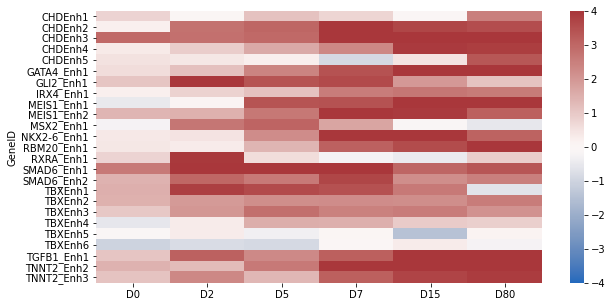

In [14]:
### H3K27AC
fig, ax = plt.subplots(1, figsize=(10,5))
sns.heatmap(H3K27AC_Normalized_DF_Log2_Mean[['D0', 'D2', 'D5','D7', 'D15', 'D80']], center = 0, vmin=-4,vmax=4, cmap="vlag")
#plt.savefig('./H3K27ac_Target_Heatmap.pdf')

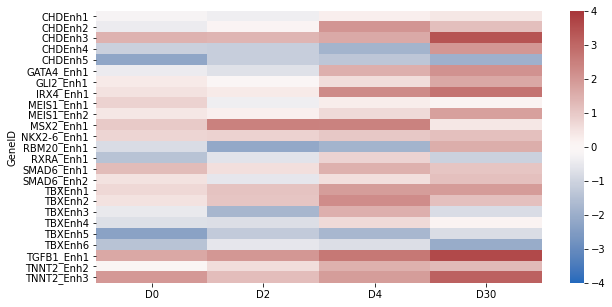

In [15]:
### ATAC
fig, ax = plt.subplots(1, figsize=(10,5))
sns.heatmap(ATAC_RPKM_Log2_Mean[['D0', 'D2', 'D4','D30']], center = 0, vmin=-4,vmax=4, cmap="vlag")
#plt.savefig('./ATAC_Target_Heatmap.pdf')